In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install unrar
!unrar x '/content/drive/MyDrive/COVID_Detection_Project/dataset.rar'

Streaming output truncated to the last 5000 lines.
Extracting  dataset/normal_images/Normal-6710.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6711.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6712.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6713.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6714.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6715.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6716.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6717.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6718.png                         75%  OK 
Extracting  dataset/normal_images/Normal-6719.png                         75%  OK 
Extracting  dataset/normal_im

# Import Libraries

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [56]:
# paths to covid and normal images
covid = '/content/dataset/covid_images'
normal = '/content/dataset/normal_images'
lung_opacity = '/content/dataset/lung_opacity_images'
viral_pneumonia = '/content/dataset/viral_pneumonia_images'

In [85]:
print(len(os.listdir(covid)), len(os.listdir(normal)), len(os.listdir(lung_opacity)), len(os.listdir(viral_pneumonia)))

3616 10192 6012 1345


In [86]:
filenames = os.listdir(covid) + os.listdir(normal) + os.listdir(lung_opacity) + os.listdir(viral_pneumonia)

In [88]:
print(len(filenames))

21165


In [89]:
categories = []

for filename in filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(1))
    elif category == 'Normal':
        categories.append(str(0))
    elif category == 'Viral Pneumonia':
        categories.append(str(3))
    elif category == 'Lung_Opacity':
        categories.append(str(2))

In [90]:
print(len(categories))

21165


In [91]:
# creating dataframe form the filenames and the category
for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(covid, filenames[i])
    elif 'Normal' in filenames[i]:
        filenames[i] = os.path.join(normal, filenames[i])
    elif 'Lung_Opacity' in filenames[i]:
        filenames[i] = os.path.join(lung_opacity, filenames[i])
    elif 'Viral Pneumonia' in filenames[i]:
        filenames[i] = os.path.join(viral_pneumonia, filenames[i])

In [92]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [93]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

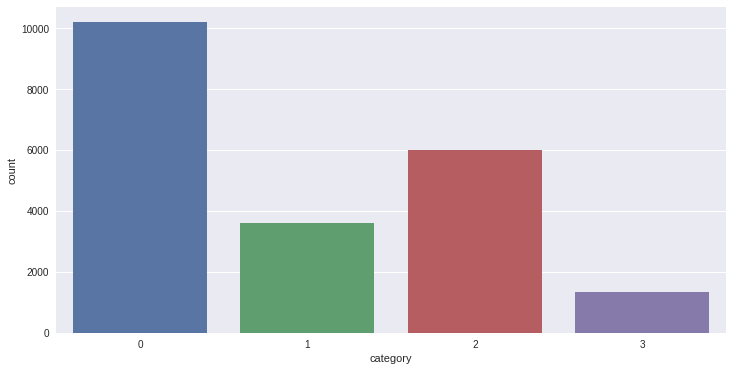

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(data = df.sort_values(by='category'), x ='category')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [96]:
train_data, test_valid_data = train_test_split(df, test_size=0.2, random_state = 42, shuffle=True, stratify=df['category'])
train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)

In [97]:
test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,
                                         shuffle=True, stratify=test_valid_data['category'])
test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [98]:
print(len(train_data),len(valid_data), len(test_data))

16932 2117 2116


In [ ]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))


train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(458).jpg', '/content/datasets/Data/train/COVID19/COVID19(114).jpg', '/content/datasets/Data/train/COVID19/COVID19(570).jpg', '/content/datasets/Data/train/COVID19/COVID19(445).jpg', '/content/datasets/Data/train/COVID19/COVID19(159).jpg', '/content/datasets/Data/train/COVID19/COVID19(26).jpg', '/content/datasets/Data/train/COVID19/COVID19(345).jpg', '/content/datasets/Data/train/COVID19/COVID19(221).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(334).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1316).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1115).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1029).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1202).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(240).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(148).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(407).jpg']


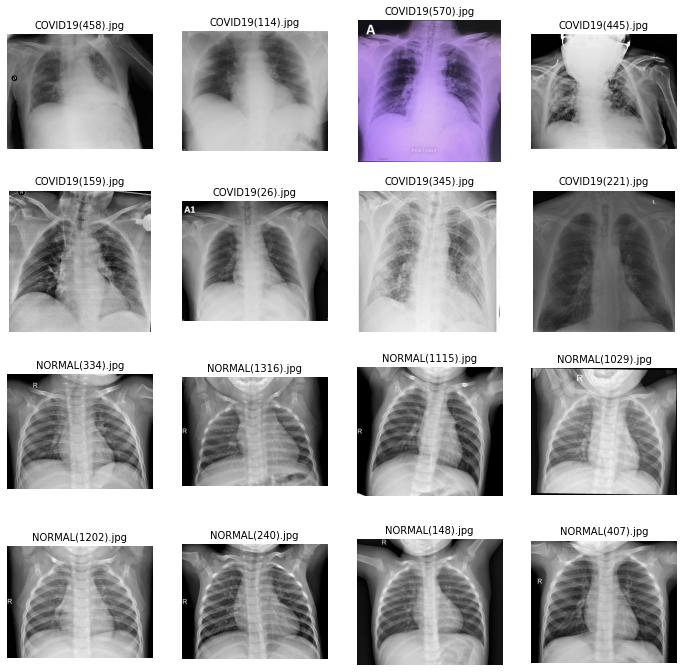

In [ ]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

# Generating Training , Validation & Testing Batches

In [99]:
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [102]:
train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
) 

Found 16932 validated image filenames belonging to 4 classes.


In [103]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data, 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 2117 validated image filenames belonging to 4 classes.


In [104]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = valid_data_gen.flow_from_dataframe(
    test_data, 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 2116 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [105]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

In [106]:
train_generator.image_shape

(150, 150, 3)

# Build CNN Model

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(4,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 37, 37, 64)       

# Compile & Train Model

In [113]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [115]:
#train the model
history = model.fit(train_generator,
                              epochs=35,
                              validation_data = valid_generator)

Epoch 1/35
530/530 [==============================] - 108s 203ms/step - loss: 0.9335 - accuracy: 0.5994 - val_loss: 0.7933 - val_accuracy: 0.6552
Epoch 2/35
530/530 [==============================] - 107s 202ms/step - loss: 0.8517 - accuracy: 0.6412 - val_loss: 0.7634 - val_accuracy: 0.6755
Epoch 3/35
530/530 [==============================] - 107s 201ms/step - loss: 0.8091 - accuracy: 0.6682 - val_loss: 0.6902 - val_accuracy: 0.6944
Epoch 4/35
530/530 [==============================] - 107s 201ms/step - loss: 0.7870 - accuracy: 0.6718 - val_loss: 0.6720 - val_accuracy: 0.7246
Epoch 5/35
530/530 [==============================] - 107s 201ms/step - loss: 0.7562 - accuracy: 0.6895 - val_loss: 0.6355 - val_accuracy: 0.7303
Epoch 6/35
530/530 [==============================] - 107s 201ms/step - loss: 0.7236 - accuracy: 0.7063 - val_loss: 0.6079 - val_accuracy: 0.7676
Epoch 7/35
530/530 [==============================] - 106s 200ms/step - loss: 0.7042 - accuracy: 0.7149 - val_loss: 0.5870 -

In [116]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

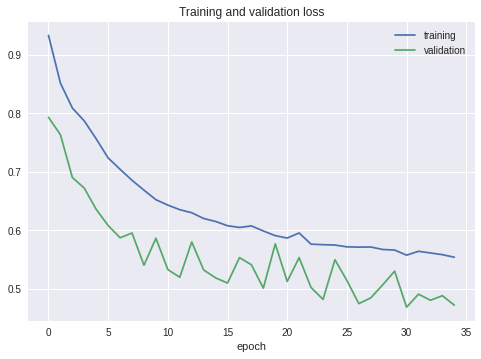

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

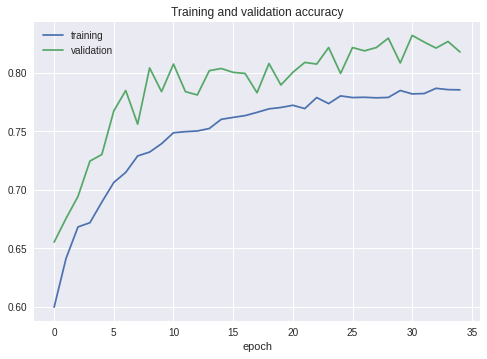

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [119]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

67/67 [==============================] - 5s 67ms/step - loss: 0.4962 - accuracy: 0.8129
test acc :0.8128544688224792 test loss:0.49618765711784363


In [122]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes== 0:
    print('Normal')
  elif classes == 1:
    print('COVID-19')
  elif classes == 2:
    print('Lung Opacity')
  elif classes == 3:
    print('Viral Pneumonia')

Saving Viral Pneumonia-9.png to Viral Pneumonia-9 (1).png
/content/Viral Pneumonia-9.png
[[1. 0. 0. 1.]]


In [123]:
model.save('4_classes_custom_model.h5')

In [124]:
from google.colab import files
files.download('4_classes_custom_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>